# **Excercise Sheet 3:** Feature Selection and Regularization

# Part A: Foundations & Concepts

Before diving into coding and implementing feature selection and regularization techniques, it's important to understand the fundamental concepts and motivations behind these methods.

Take a moment to reflect on these concepts yourself before seeking additional help from ChatGPT 😉 You're also encouraged to discuss these ideas with your classmates.

## 1. General Concepts

### a) Why do we need to do feature seelction or regularization when wanting to do a linear regression model with a high number of features?

#### Your Answer:

#### Solution:
- Overfitting: the model may fit the training data too closely, capturing noise rather than the underlying pattern. Bad generalization to new data.
- Computational Cost: More features lead to increased computational complexity, making the model slower to train and evaluate.
- Interpretability: A model with too many features can be difficult to interpret.
- Numerical issues with model fitting, not able to estimate the coefficients properly.

### b) What does feature selection mean and how does it differ from regularization?

#### Your Answer:

#### Solution:
- Feature selection: Drop some features from the model, based on some criteria (e.g. correlation with target variable, statistical tests, etc.). The model is trained only on the selected features.
- Regularization: All features are still included in the model, but their impact is reduced.

### c) Can we be confident that we select the correct variables in feature selection?

#### Your Answer:

#### Solution:
- It depends, in general it's difficult.
- One issue could be that with a lot of predictors, some of them might just relate to the target by chance, and we might select them wrongly.
- Another issue is that with highly correlated predictors, we might select one of them, but not the other, even if both are important for the outcome.

# Part B: Coding & Visualization

Now let's apply our knowledge of feature selection and regularization! We start with some imports needed.

*Hint:* The functions imported from the Helper file, may help you in certain tasks, but you are not required to use them. You can also write your own code to achieve the same results. 

## Notes:
- Note: We need to use OLS for the summary table and haven't used it up to now (in handsons). Maybe we need to give a hint
- I think we should use the same dataset for all tasks, because this way we can compare the results.

In [1]:
# Standard Libraries
import numpy as np
import pandas as pd
import warnings

# Visualization
import seaborn as sns

# Scikit-learn: Data Processing
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scikit-learn: Models and Metrics
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Statistical Models
from statsmodels.api import OLS, add_constant

# Helper Functions
from helper import (
    plot_pca_cumvar,
    cross_validate_regularization,
    regularization_coef_progression
)

# Configuration
warnings.filterwarnings("ignore")

## 2. Linear Regression with high-dimensional data

TODO: Text about dataset once fixed

### a) Load and inspec the dataset `riboflavin.csv`
- What types of predictors and outcomes are present in the dataset?
- Plot pairplots of the first 5 variables (*hint:* use sns.pairplot)

In [2]:
# Student Code

In [ ]:
# Load data
riboflavin = pd.read_csv('riboflavin.csv')

In [ ]:
# Inspect Data
print(riboflavin.shape)
riboflavin.head()

(71, 4088)


,x.AADK_at,x.AAPA_at,x.ABFA_at,x.ABH_at,x.ABNA_at,x.ABRB_at,x.ACCA_at,x.ACCB_at,x.ACCC_at,x.ACDA_at,...,x.YYDF_i_at,x.YYDG_at,x.YYDH_at,x.YYDI_at,x.YYDJ_at,x.YYDK_at,x.YYXA_at,x.YYZB_at,x.YYZE_at,x.zur_at
0,8.492404,8.111451,8.320842,10.287112,8.261279,10.208273,9.745474,9.818821,9.676227,8.372443,...,7.882737,5.440163,4.981684,6.481998,5.363919,7.773494,7.668711,3.762119,7.172823,7.427105
1,7.639380,7.239965,7.289051,9.862287,7.303497,9.500023,9.216008,9.854946,9.650078,7.732604,...,7.912135,5.383739,4.597438,6.390127,4.763876,7.336261,7.600104,3.761616,7.187113,7.545287
2,8.088340,7.855510,7.793395,9.676720,7.098273,9.473917,9.580384,9.926077,9.787129,7.925034,...,7.354618,5.718795,4.468228,6.123498,5.400686,7.573388,7.873352,3.741953,7.251285,7.718321
3,7.886820,7.939513,7.997588,9.680562,7.408494,9.788725,9.447722,9.852773,9.546915,7.838269,...,7.691985,5.561048,4.787030,5.904708,5.139692,7.214269,7.384115,3.887179,7.117375,7.260654
4,6.805762,7.554522,7.609902,8.551953,7.712407,8.490847,8.696249,8.573272,8.589661,7.905928,...,7.999088,5.549914,5.258139,6.206778,4.910169,6.884474,6.996956,4.034177,7.722534,6.828164


In [ ]:
# Check the features and outcomes
print("Features:")
print(riboflavin.columns.tolist())

Features:
['x.AADK_at', 'x.AAPA_at', 'x.ABFA_at', 'x.ABH_at', 'x.ABNA_at', 'x.ABRB_at', 'x.ACCA_at', 'x.ACCB_at', 'x.ACCC_at', 'x.ACDA_at', 'x.ACKA_at', 'x.ACOA_at', 'x.ACOB_at', 'x.ACOC_at', 'x.ACOL_at', 'x.ACOR_at', 'x.ACPA_at', 'x.ACSA_at', 'x.ACUA_at', 'x.ACUB_at', 'x.ACUC_at', 'x.ADAA_at', 'x.ADAB_at', 'x.ADDA_at', 'x.ADDB_at', 'x.ADEC_at', 'x.ADHA_at', 'x.ADHB_at', 'x.ADK_at', 'x.AHPC_at', 'x.AHPF_at', 'x.AHRC_at', 'x.ALAS_at', 'x.ALD_at', 'x.ALDX_at', 'x.ALDY_at', 'x.ALKA_at', 'x.ALSD_at', 'x.ALSR_at', 'x.ALSS_at', 'x.ALST_at', 'x.AMHX_at', 'x.AMPS_at', 'x.AMYC_at', 'x.AMYD_at', 'x.AMYE_at', 'x.AMYX_at', 'x.ANSA_at', 'x.ANSB_at', 'x.ANSR_at', 'x.APPA_at', 'x.APPB_at', 'x.APPC_at', 'x.APPD_at', 'x.APPF_at', 'x.APRE_at', 'x.APRX_at', 'x.APT_at', 'x.ARAA_at', 'x.ARAB_at', 'x.ARAD_at', 'x.ARAE_at', 'x.ARAL_at', 'x.ARAM_at', 'x.ARAN_at', 'x.ARAP_at', 'x.ARAQ_at', 'x.ARAR_at', 'x.ARGB_at', 'x.ARGC_at', 'x.ARGD_at', 'x.ARGE_at', 'x.ARGF_at', 'x.ARGG_at', 'x.ARGH_at', 'x.ARGJ_at', 'x.AR

In [ ]:
# Check for categorical features and their values
print("Data types:")
print(riboflavin.dtypes)

Data types:
x.AADK_at    float64
x.AAPA_at    float64
x.ABFA_at    float64
x.ABH_at     float64
x.ABNA_at    float64
              ...   
x.YYDK_at    float64
x.YYXA_at    float64
x.YYZB_at    float64
x.YYZE_at    float64
x.zur_at     float64
Length: 4088, dtype: object


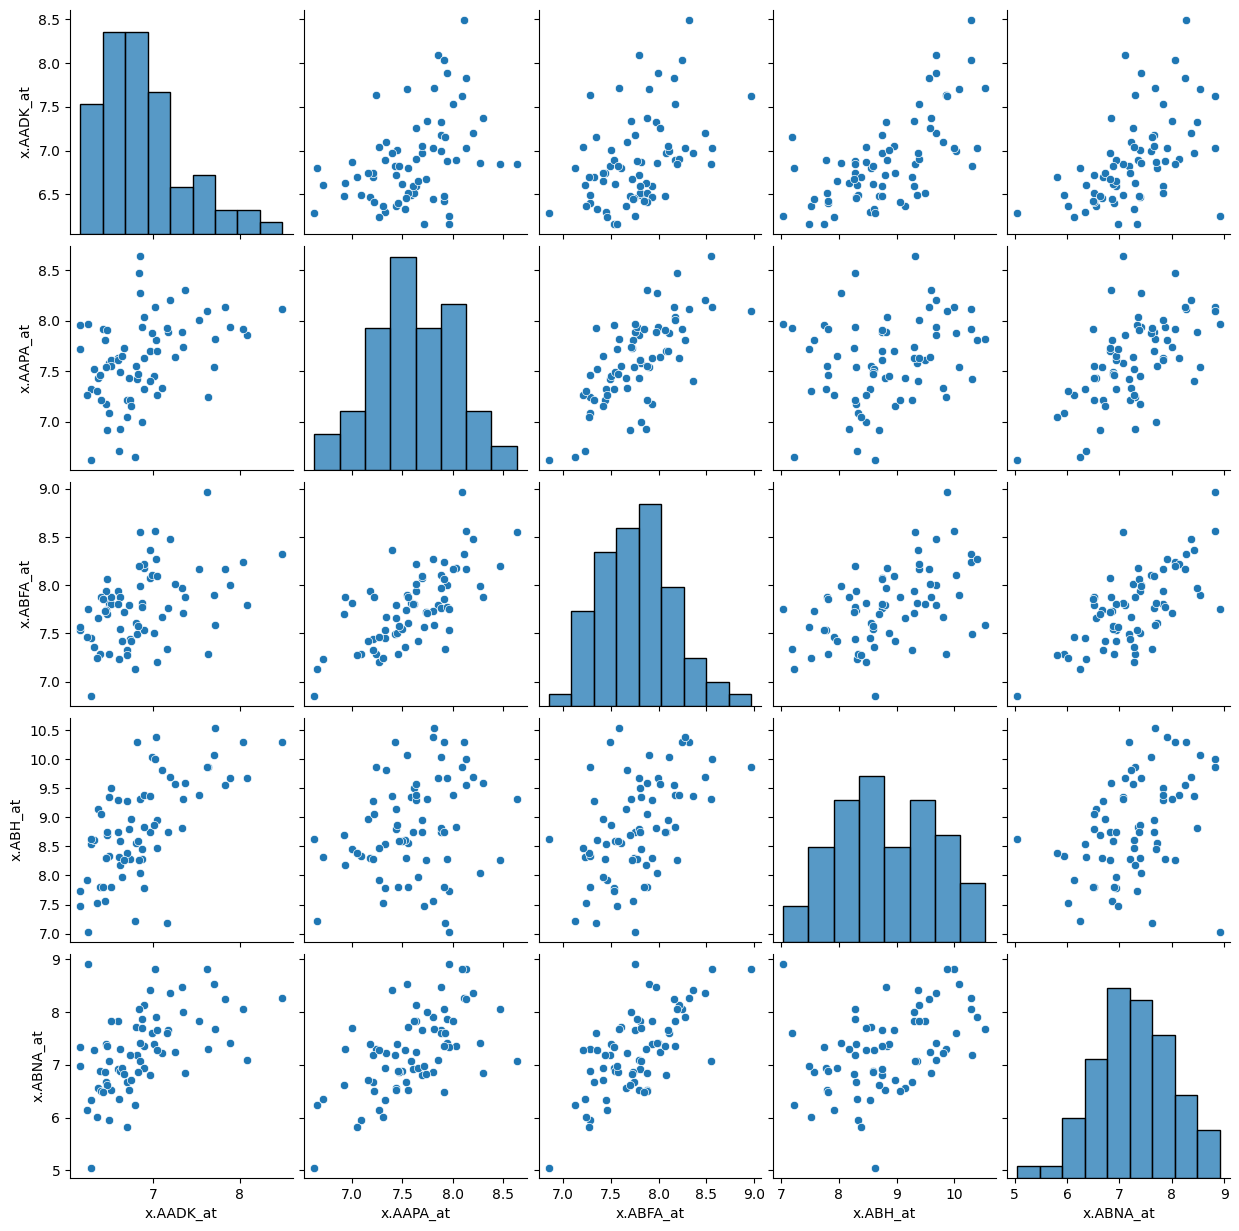

In [ ]:
# pairplot of the first 5 variables
sns.pairplot(riboflavin.iloc[:, :5])

In [ ]:
X = riboflavin.drop(columns=['y'])
y = riboflavin['y']

### b) Split the dataset into training and test set (70%/30% split)

In [8]:
# Student Code

In [ ]:
# Split the Dataset into training and test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### c) Perform a linear regression using first using all features. (Print the regression Table)

In [10]:
# Student Code

In [ ]:
# Perform linear regression using all features
# Fit the model
model_full = LinearRegression()
model_full.fit(X_train, y_train);

# # Create a summary table
# X_train_const = add_constant(X_train)
# model_ols = OLS(y_train, X_train_const).fit()
# print(model_ols.summary())

### d) Now perform a linear regression using only the first 20 features. (Compare the two models using the linear regression table)

In [12]:
# Student Code

In [ ]:
# Perform a linear regresion using the first 10 features

num_features = 10

X_train_reduced = X_train.iloc[:, :num_features]
X_test_reduced = X_test.iloc[:, :num_features]

model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train);

### e) Calculate MSE and R2 for both models on the training data. What can you conclude?

In [14]:
# Student Code

In [15]:
# Compute MSE and R2 for both models

# Predictions for the full model
y_pred_full = model_full.predict(X_train)
mse_full = mean_squared_error(y_train, y_pred_full)
r2_full = r2_score(y_train, y_pred_full)

print("Full Model MSE:", mse_full)
print("Full Model R2:", r2_full)


Full Model MSE: 1.5292632119784472e-28
Full Model R2: 1.0


In [16]:
# Predictions for the reduced model
y_pred_reduced = model_reduced.predict(X_train_reduced)
mse_reduced = mean_squared_error(y_train, y_pred_reduced)
r2_reduced = r2_score(y_train, y_pred_reduced)

print("Reduced Model MSE:", mse_reduced)
print("Reduced Model R2:", r2_reduced)

Reduced Model MSE: 0.5333808162092492
Reduced Model R2: 0.3234348617985765


We see that the full model nearly finds a perfect fit on the training data, while the reduced model has a much lower R2 and higher MSE. This is could lead to the conclusion that the full model is outperforming the reduced model.

### f) Now predict and calculate MSE and R2 for both models on the test data. Is there a difference? What can you conclude?

TODO: Overfitting Not visible with this dataset!

In [17]:
# Predictions on test data full model
y_test_pred_full = model_full.predict(X_test)
mse_test_full = mean_squared_error(y_test, y_test_pred_full)
r2_test_full = r2_score(y_test, y_test_pred_full)

print("Test Full Model MSE:", mse_test_full)
print("Test Full Model R2:", r2_test_full)

Test Full Model MSE: 0.23464130329822577
Test Full Model R2: 0.7473861687788446


In [ ]:
# Predictions on test data reduced model
y_test_pred_reduced = model_reduced.predict(X_test_reduced)
mse_test_reduced = mean_squared_error(y_test, y_test_pred_reduced)
r2_test_reduced = r2_score(y_test, y_test_pred_reduced)

print("Test Reduced Model MSE:", mse_test_reduced)
print("Test Reduced Model R2:", r2_test_reduced)

Test Reduced Model MSE: 0.6805915401914476
Test Reduced Model R2: 0.26727803652730286


### g) Show a plot of the fitted regression lines for the test data. How is the overfitting of model 2 visible? What features? Using PCA? 

TODO: How do you want to plot the fitted regression lines since data is high-dimensional?

In [19]:
# Student Code

In [ ]:
# Solution?

## 3. PCA Regression

Notes:
- Maybe add a cross-validation plot over how many pc's used for the regression


### a) Load the dataset `leukemia.csv`
- What types of predictors and outcomes are present in the dataset?
- Plot pairplots of the first 5 variables

- Note:
We keep the same dataset as before currently

In [21]:
# Load dataset
leukemia = pd.read_csv('leukemia.csv')

In [ ]:
# Inspect Data
print(leukemia.shape)
leukemia.head()

(72, 3571)


,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.3562,x.3563,x.3564,x.3565,x.3566,x.3567,x.3568,x.3569,x.3570,x.3571
0,0.561549,0.213566,-0.636584,0.347124,0.545509,1.720235,1.855733,1.800899,0.109675,-0.288622,...,0.046676,0.126567,0.612847,0.443502,0.859035,-0.672449,0.150163,0.068992,0.129263,-0.533470
1,-0.623141,-0.912107,-0.465296,-0.734345,-0.539898,0.000112,-0.717583,0.733661,0.018900,-0.159573,...,-0.180749,-0.146952,-0.453801,-0.527682,-0.457939,0.412000,0.392065,0.054326,0.007136,-1.148372
2,-0.814524,-1.084069,-0.583127,1.785912,1.445064,1.099342,1.111595,1.178676,-0.193477,-0.116155,...,-0.813904,0.620945,1.117184,1.572018,-0.355646,0.921390,-1.207114,0.479036,1.546484,-0.391755
3,0.229492,-0.965719,-0.525060,-0.188016,-0.534603,1.177447,1.057922,1.126832,0.289006,-0.085842,...,0.549908,-1.229743,0.739719,0.115690,-0.110720,0.581664,-1.001332,-0.197117,-0.990989,-0.924845
4,-0.706016,0.660884,-0.548306,-0.702840,-0.285707,0.428307,1.144897,-0.180164,0.194169,0.251461,...,-1.211262,-1.909517,-1.208151,-1.095057,-0.391334,-0.023814,0.639460,-1.816627,0.140519,-1.194537


In [ ]:
# Check the features and outcomes
print("Features:")
print(leukemia.columns.tolist())

Features:
['x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8', 'x.9', 'x.10', 'x.11', 'x.12', 'x.13', 'x.14', 'x.15', 'x.16', 'x.17', 'x.18', 'x.19', 'x.20', 'x.21', 'x.22', 'x.23', 'x.24', 'x.25', 'x.26', 'x.27', 'x.28', 'x.29', 'x.30', 'x.31', 'x.32', 'x.33', 'x.34', 'x.35', 'x.36', 'x.37', 'x.38', 'x.39', 'x.40', 'x.41', 'x.42', 'x.43', 'x.44', 'x.45', 'x.46', 'x.47', 'x.48', 'x.49', 'x.50', 'x.51', 'x.52', 'x.53', 'x.54', 'x.55', 'x.56', 'x.57', 'x.58', 'x.59', 'x.60', 'x.61', 'x.62', 'x.63', 'x.64', 'x.65', 'x.66', 'x.67', 'x.68', 'x.69', 'x.70', 'x.71', 'x.72', 'x.73', 'x.74', 'x.75', 'x.76', 'x.77', 'x.78', 'x.79', 'x.80', 'x.81', 'x.82', 'x.83', 'x.84', 'x.85', 'x.86', 'x.87', 'x.88', 'x.89', 'x.90', 'x.91', 'x.92', 'x.93', 'x.94', 'x.95', 'x.96', 'x.97', 'x.98', 'x.99', 'x.100', 'x.101', 'x.102', 'x.103', 'x.104', 'x.105', 'x.106', 'x.107', 'x.108', 'x.109', 'x.110', 'x.111', 'x.112', 'x.113', 'x.114', 'x.115', 'x.116', 'x.117', 'x.118', 'x.119', 'x.120', 'x.121', 'x.122',

In [ ]:
# Check for categorical features and their values
print("Data types:")
print(leukemia.dtypes)

Data types:
x.1       float64
x.2       float64
x.3       float64
x.4       float64
x.5       float64
           ...   
x.3567    float64
x.3568    float64
x.3569    float64
x.3570    float64
x.3571    float64
Length: 3571, dtype: object


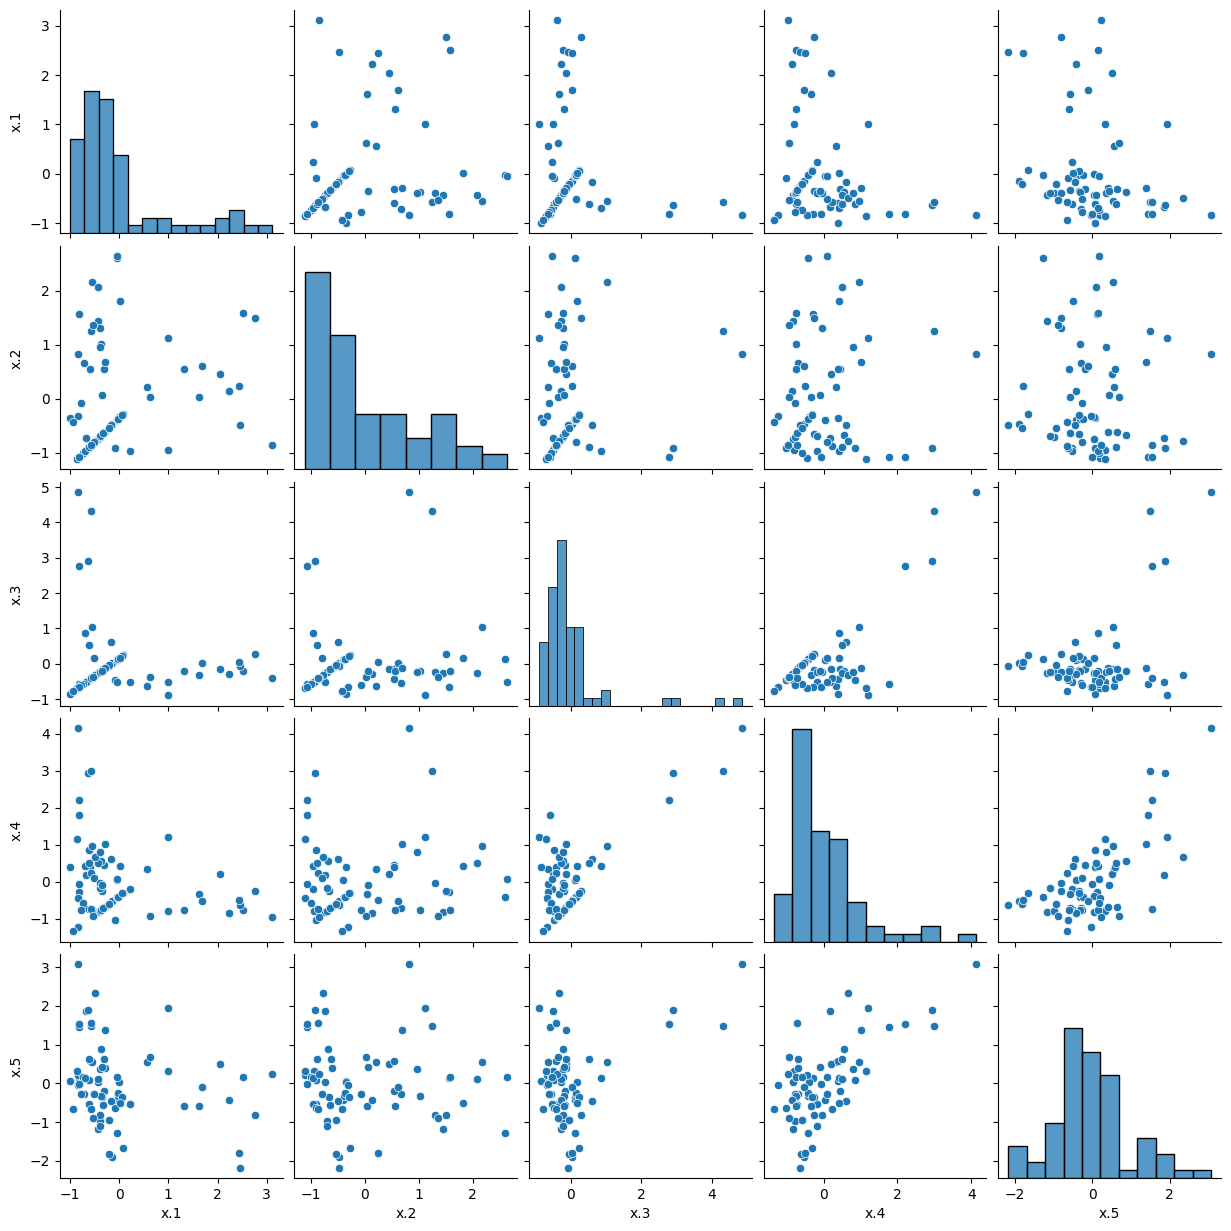

In [ ]:
# pairplot of the first 5 variables
sns.pairplot(leukemia.iloc[:, :5])

In [ ]:
X = leukemia.drop(columns=['y'])
y = leukemia['y']

In [ ]:
# TODO: We skip the leukemia dataset for now
# # Split the Dataset into training and test set (70% training, 30% test)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42
# )   

### b) Perform a linear regression using all the features and print the regression tabble. What do you observe?

Note: technically we have already done this before

In [28]:
# Student Code

In [ ]:
# Solution
# # Create a summary table
X_train_const = add_constant(X_train)
model_ols = OLS(y_train, X_train_const).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 09 Jul 2025   Prob (F-statistic):                nan
Time:                        11:35:29   Log-Likelihood:                 1498.7
No. Observations:                  49   AIC:                            -2899.
Df Residuals:                       0   BIC:                            -2807.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.882e-05        inf        

All coefficients are very small and p-values are NaN, because the model is not able to estimate the coefficients properly (due to p >> n).

### c) Perform PCA on the dataset. Is it important to scale the data before PCA? 

*Hint:* Check if the units of the data differs

In [30]:
# Student Code

In [31]:
# Optional Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Perform PCA on the dataset, compute 30 principal components
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In this case I'd say it's not necessary to scale the data, since all features are genetic data and have the same unit (gene expression).

### d) Plot the cumulative explained variance. How many are needed to explain 80% of the variance?

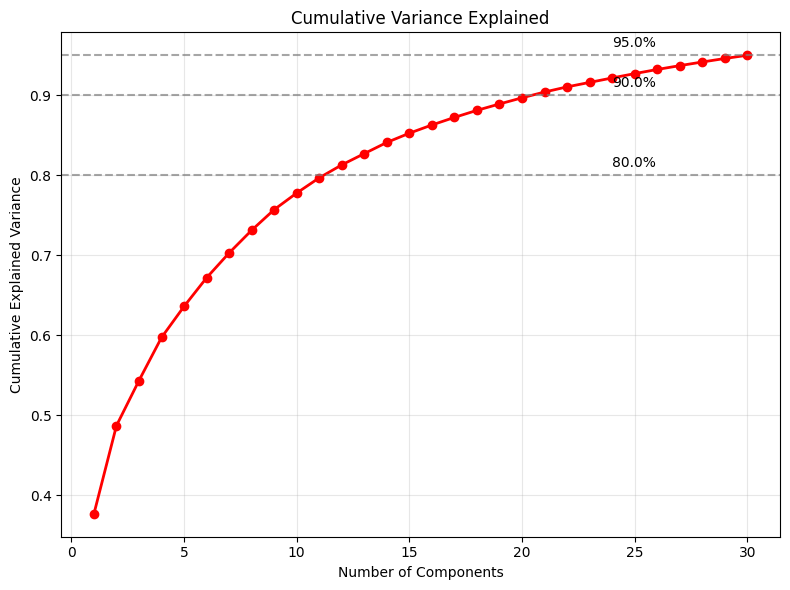

In [33]:
plot_pca_cumvar(pca)

Around 11 components are needed to explain 80% of the variance.

### e) Now let's compute the linear regression using enough principal components to explain 80% of the variance.

*Hint:* if you did not solve the previous exercise, continue with 10 principal components (or all).

In [34]:
# Student Code

In [ ]:
# Fit linear regression on PCA components
num_pc = 11

X_train_pca_reduced = X_train_pca[:, :num_pc]
X_test_pca_reduced = X_test_pca[:, :num_pc]

model_pca = LinearRegression()
model_pca.fit(X_train_pca_reduced, y_train);

In [ ]:
# Note: We need to use OLS for the summary table and haven't used it up to now. Maybe we need to give a hint
# # Create a summary table
X_train_pca_const = add_constant(X_train_pca_reduced)
model_pca_ols = OLS(y_train, X_train_pca_const).fit()

### f) Print the regression table. Are the coefficients interpretable?

In [37]:
print(model_pca_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     11.91
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           4.33e-09
Time:                        11:35:30   Log-Likelihood:                -26.632
No. Observations:                  49   AIC:                             77.26
Df Residuals:                      37   BIC:                             99.97
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1982      0.069   -105.081      0.0

Coefficients are interpretable but meaningful interpretation is challenging. We have to look at the loadings of the different PCs. If the first two PCs show different loadings of clinically meaningful features, then the coefficients can be meaningful interpreted. Otherwise rather challenging. 

But we reduce computational power and importantly overfitting with PCA regression compared to regression with all predictors.

### g) Calculate MSE and R2 for the PCA regression on the training data. What can you conclude?

In [38]:
# Student Code

In [ ]:
# Calculate MSE and R2 for PCA model
y_pred_pca = model_pca.predict(X_test_pca_reduced)
mse_test_pca = mean_squared_error(y_test, y_pred_pca)
r2_test_pca = r2_score(y_test, y_pred_pca)

print("Test Full Model MSE:", mse_test_full)
print("Test Full Model R2:", r2_test_full)

print("PCA Model MSE:", mse_test_pca)
print("PCA Model R2:", r2_test_pca)

Test Full Model MSE: 0.23464130329822577
Test Full Model R2: 0.7473861687788446
PCA Model MSE: 0.4319643318059553
PCA Model R2: 0.5349490338037433


TODO: Interpretation once fixed dataset

## 4. Ridge and Lasso Regression

Note: Maybe dataset is too high-dimensional

### a) Load the dataset `data/todo.csv`
- What types of predictors and outcomes are present in the dataset?
- Plot pairplots of the first 5 variables

Note: currently dataset is reduced so nothing to do here

In [40]:
# Currently the Dataset is reused so nothing here

### b) Split dataset into training and test set (70%/30% split)

In [41]:
# Student Code

In [42]:
# Done earlier, because we reused the dataset

### c) Fit Ridge regression with different alphas using training data. What is the optimal alpha?

In [43]:
# Student Code

In [44]:
alphas = np.logspace(-2, 8, 50)

# Option A: Using RidgeCV
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)
optimal_alpha = ridge_cv.alpha_
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 790.6043210907702


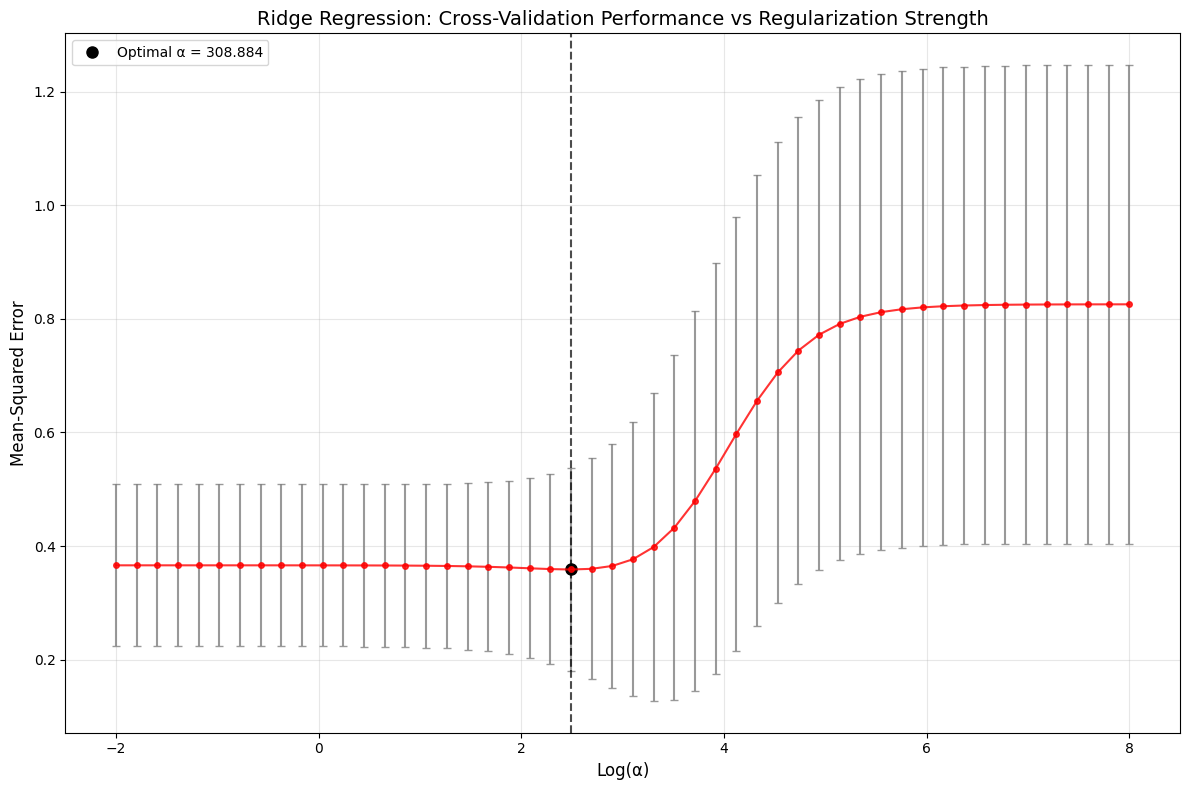

Optimal alpha from helper function: 308.8843596477485


In [45]:
# Option B: Visualize using helper function
optimal_alpha = cross_validate_regularization(
    X_train, y_train, alphas=alphas, model_name='Ridge')

print("Optimal alpha from helper function:", optimal_alpha)

Why do we have different alphas??

### e) Show coefficient shrinkage for different alphas. What do you observe? Do you expect coefficients to be zero for some alphas?

In [46]:
# Student Code

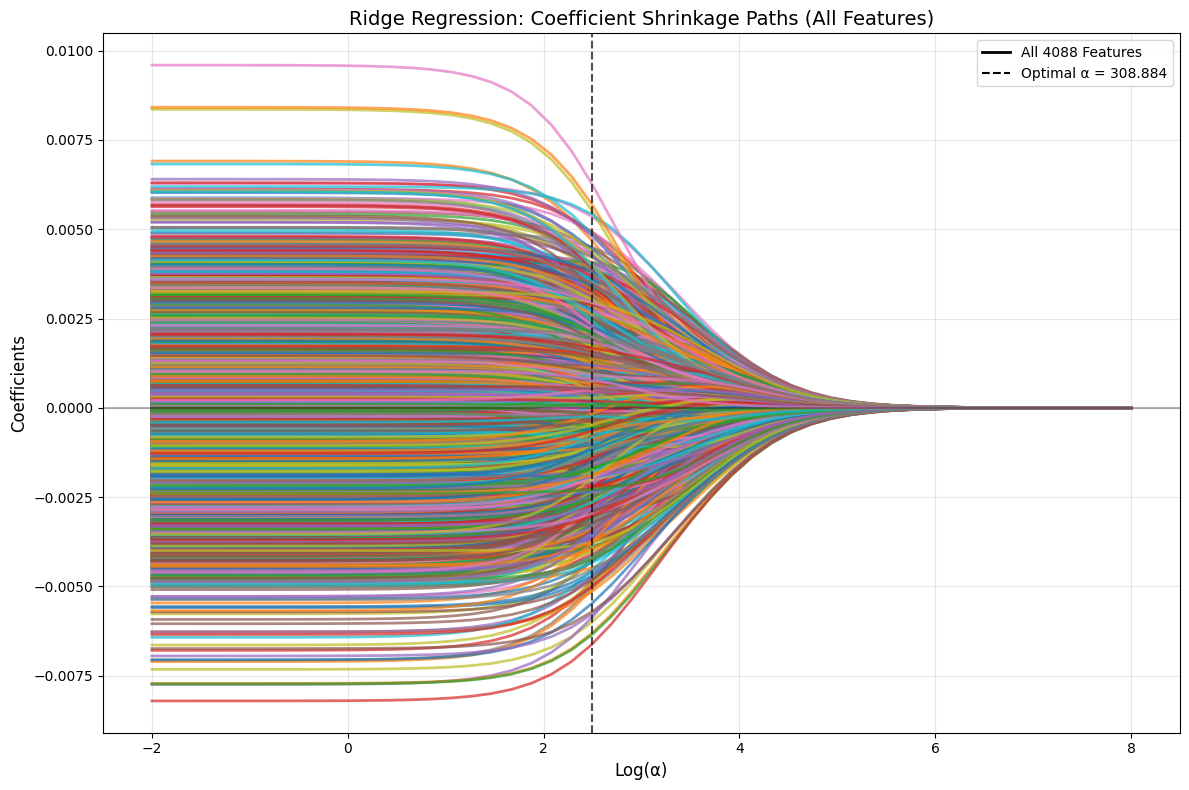

In [47]:
# Coef progression
regularization_coef_progression(
    X_train, y_train, alphas=alphas, model_name='Ridge', optimal_alpha=optimal_alpha)

We can see that with ridge regression, coefficients are shrunk towards zero, but not to zero.

### f) Fit Lasso regression with different alphas using training data

In [48]:
# Student Code

In [49]:
alphas = np.logspace(-6, 3, 50)

# Option A: Using LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
optimal_alpha = lasso_cv.alpha_
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 0.0167683293681101


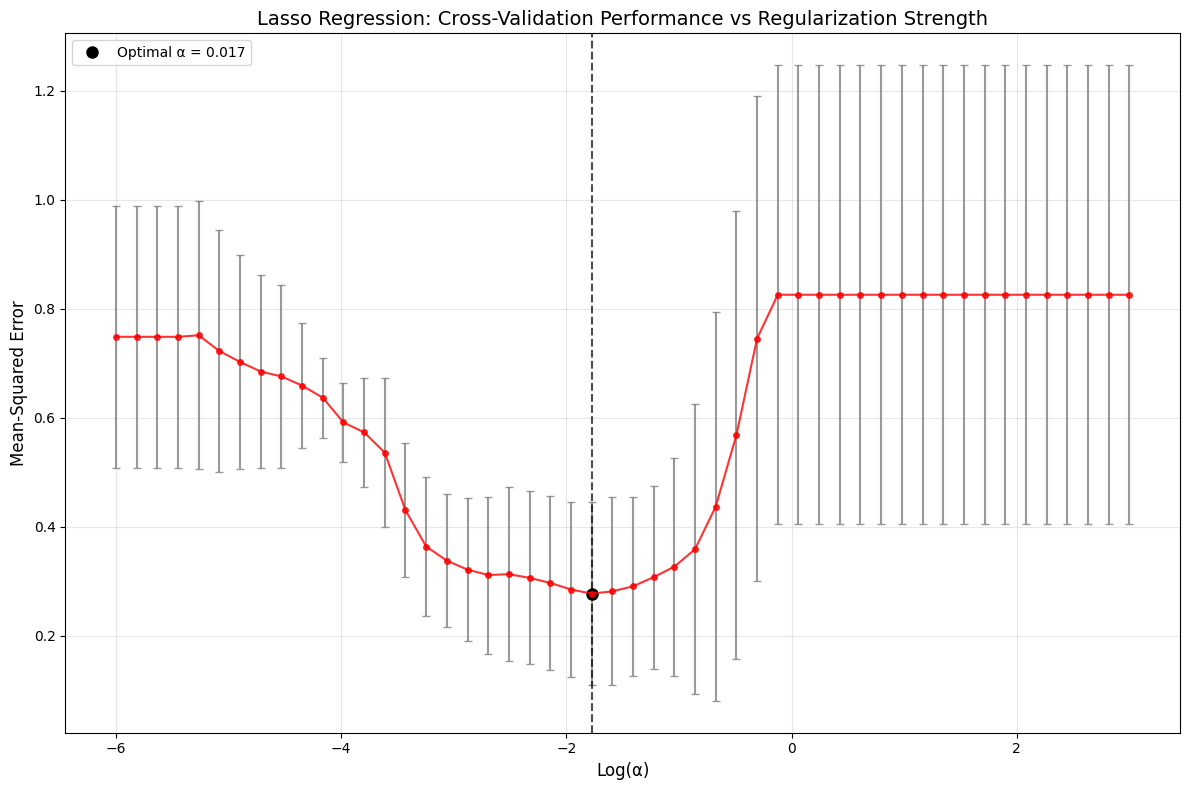

Optimal alpha from helper function: 0.0168


In [50]:
# Option B: Visualize using helper function
optimal_alpha = cross_validate_regularization(
    X_train, y_train, alphas=alphas, model_name='Lasso')

print(f"Optimal alpha from helper function: {optimal_alpha:.4f}")

### g) Show the coefficients for each alpha. How do they change with increasing alpha? Are features dropped?

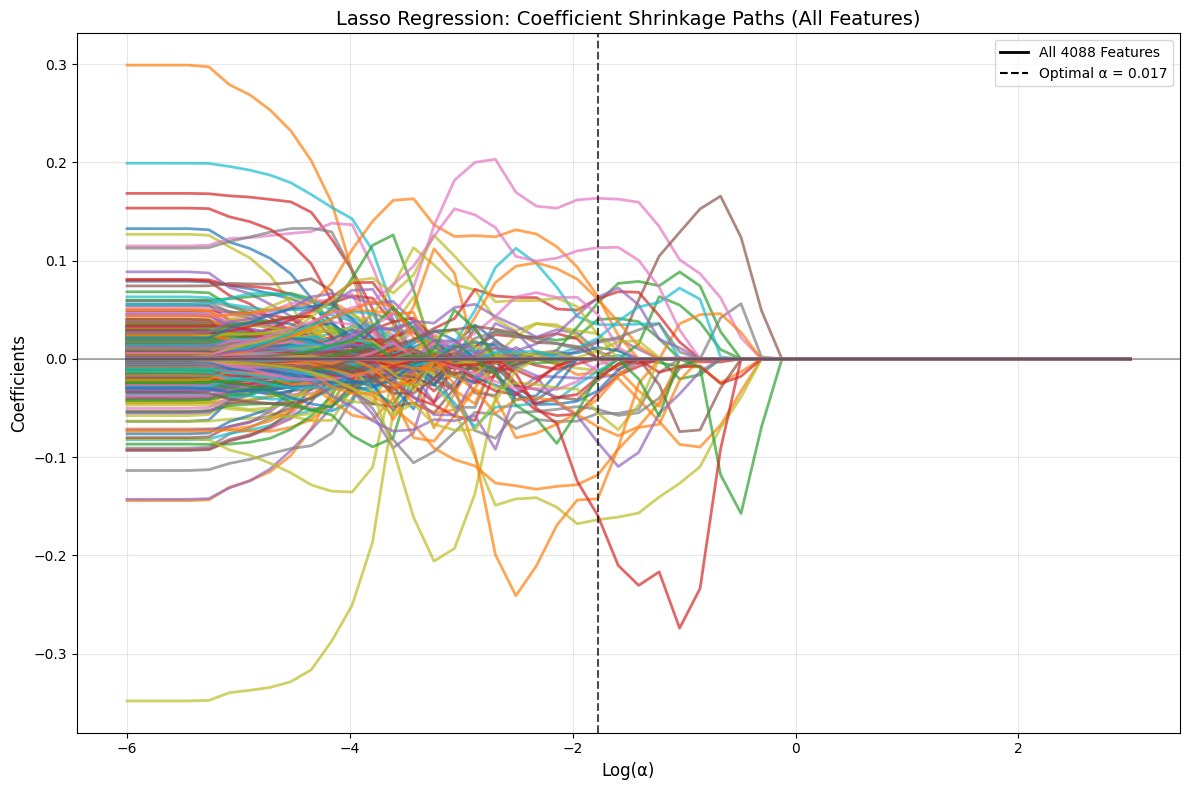

In [51]:
# Coef progression
regularization_coef_progression(
    X_train, y_train, alphas=alphas, model_name='Lasso', optimal_alpha=optimal_alpha)

### h) Compare all Models (linear regresion on features, linear regression on PCA, Ridge and Lasso) using MSE and R2 on the test data. Which model performs best?

In [52]:
# Student Code

In [53]:
print("Test Full Model MSE:", mse_test_full)
print("Test Full Model R2:", r2_test_full)

Test Full Model MSE: 0.23464130329822577
Test Full Model R2: 0.7473861687788446


In [54]:
print("PCA Model MSE:", mse_test_pca)
print("PCA Model R2:", r2_test_pca)

PCA Model MSE: 0.4319643318059553
PCA Model R2: 0.5349490338037433


In [55]:
# Fit Ridge Regression on features
y_ridge_pred = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R2:", r2_ridge)

Ridge Regression MSE: 0.27575269534346175
Ridge Regression R2: 0.7031258185958147


In [56]:
# Fit Lasso Regression on features
y_lasso_pred = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R2:", r2_lasso)

Lasso Regression MSE: 0.3369650516961121
Lasso Regression R2: 0.6372248555557983


TODO: Interpretation once fixed.

## 5. Cross-Validation

### a) What is the difference between train-test split and cross-validation?

#### Your Answer:


#### Solution:
In cross validation all data is used once as train or test. Usually used when not having a lot of data. Train-test split is used when you have a lot of data and you can afford to keep some data only for test set. 

### b) Perform a cross-validation(5-folds) with the lasso model from last exercise. Report the MSE for all folds. Are they different to the MSE of the test set form the previous exercise?

In [57]:
# Student Code

In [58]:
# Cross Validation with 5-folds for Lasso, import cross_val_score
scores = cross_val_score(lasso_cv, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE scores: {[-float(round(score, 4)) for score in scores]}")
print(f"Average Cross-validated MSE: {-scores.mean():.4f}")

Cross-validated MSE scores: [0.1931, 0.3302, 0.3199, 0.291, 0.1727]
Average Cross-validated MSE: 0.2614


Yes we see quit a difference depending on the fold!

### c) Finally we introduce a new concept which is common in clincal data science. "Leave-One-Out Cross-Validation" (LOOCV). In this method, we leave one sample out for testing and use the rest for training. This is repeated for each sample in the dataset. Implement this and compare the results to the 5-fold cross-validation. What do you observe?

*Hint:* Use `LeaveOneOut` and `cross_val_score` from sklearn

In [59]:
# Student Solution

In [60]:
# Leave-One-Out Cross Validation for Lasso
loo = LeaveOneOut()
loo_scores = cross_val_score(lasso_cv, X, y, cv=loo, scoring='neg_mean_squared_error')
print(f"Leave-One-Out Cross-validated MSE scores: {[-round(score, 4) for score in loo_scores]}")
print(f"Average Leave-One-Out Cross-validated MSE: {-loo_scores.mean():.4f}")

Leave-One-Out Cross-validated MSE scores: [np.float64(0.0041), np.float64(0.1635), np.float64(0.0207), np.float64(0.1614), np.float64(0.3987), np.float64(0.1676), np.float64(0.0501), np.float64(0.0203), np.float64(0.703), np.float64(0.0683), np.float64(0.0081), np.float64(0.2496), np.float64(0.0187), np.float64(0.0449), np.float64(0.4144), np.float64(0.0002), np.float64(0.0409), np.float64(0.1413), np.float64(0.0063), np.float64(0.2614), np.float64(0.7725), np.float64(0.0039), np.float64(0.0245), np.float64(0.1471), np.float64(0.0794), np.float64(0.0193), np.float64(0.0013), np.float64(0.0085), np.float64(1.0072), np.float64(0.0121), np.float64(3.5518), np.float64(0.0006), np.float64(0.0099), np.float64(0.1334), np.float64(0.0949), np.float64(0.0111), np.float64(0.0004), np.float64(0.011), np.float64(0.0083), np.float64(0.1847), np.float64(0.005), np.float64(0.0909), np.float64(0.0132), np.float64(0.0199), np.float64(0.0577), np.float64(0.354), np.float64(0.4422), np.float64(0.0115), n

Observations:
- Increased loading time
- Averaged MSE higher lower (update once dataset is fixed)